Time shape: (15001,)
Phi shape: (15001,)
Psi shape: (15001,)


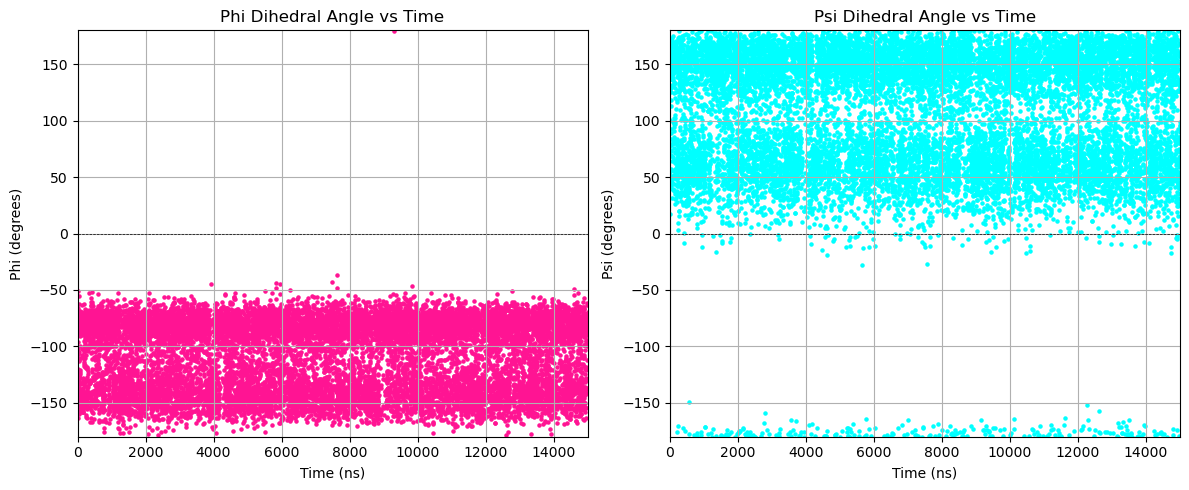

In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory
trajectory = md.load('adp_MD.trr', top='adp_MD.gro')

# Select the atoms for phi and psi dihedrals
phi_indices = [[0, 1, 2, 3]]  # Adjust these based on your system
psi_indices = [[1, 2, 3, 4]]  # Adjust these based on your system

# Calculate the dihedrals
phi = md.compute_phi(trajectory, phi_indices)
psi = md.compute_psi(trajectory, psi_indices)

# Extract the dihedral angles (second element) and convert to degrees
phi_degrees = np.degrees(phi[1].flatten())
psi_degrees = np.degrees(psi[1].flatten())

# Print shapes for debugging
print("Time shape:", trajectory.time.shape)
print("Phi shape:", phi_degrees.shape)
print("Psi shape:", psi_degrees.shape)

# Create time vector
time = trajectory.time

# Plot phi vs time
plt.figure(figsize=(12, 5))

# Plot Phi as points
plt.subplot(1, 2, 1)
plt.scatter(time[:phi_degrees.size], phi_degrees, label='Phi', color='deeppink', s=5)  # Use scatter for points
plt.title('Phi Dihedral Angle vs Time')
plt.xlabel('Time (ns)')
plt.ylabel('Phi (degrees)')
plt.xlim(0, time[-1])  # Set x-limits
plt.ylim(-180, 180)    # Set y-limits
plt.axhline(0, color='k', lw=0.5, ls='--')  # Add a horizontal line at 0
plt.grid()

# Plot Psi as points
plt.subplot(1, 2, 2)
plt.scatter(time[:psi_degrees.size], psi_degrees, label='Psi', color='aqua', s=5)  # Use scatter for points
plt.title('Psi Dihedral Angle vs Time')
plt.xlabel('Time (ns)')
plt.ylabel('Psi (degrees)')
plt.xlim(0, time[-1])  # Set x-limits
plt.ylim(-180, 180)    # Set y-limits
plt.axhline(0, color='k', lw=0.5, ls='--')  # Add a horizontal line at 0
plt.grid()

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('Dihedral_Time.png', format='png')
plt.show()


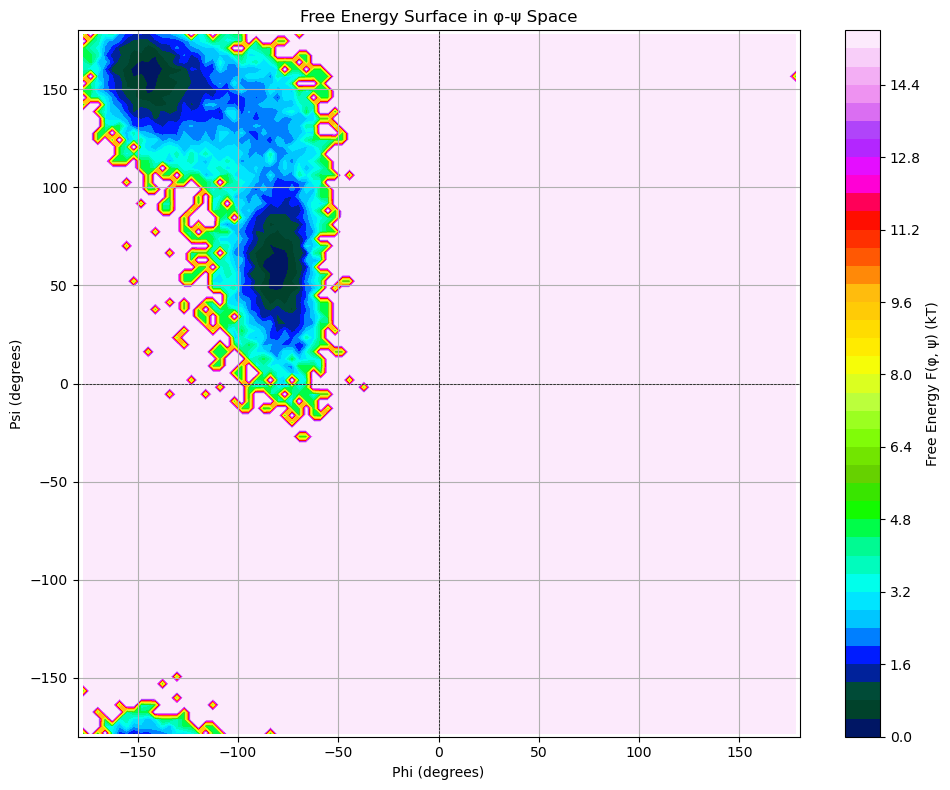

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load the trajectory
trajectory = md.load('adp_MD.trr', top='adp_MD.gro')

# Select the atoms for phi and psi dihedrals
phi_indices = [[0, 1, 2, 3]]  # Adjust based on your system
psi_indices = [[1, 2, 3, 4]]  # Adjust based on your system

# Calculate the dihedrals
phi = md.compute_phi(trajectory, phi_indices)
psi = md.compute_psi(trajectory, psi_indices)

# Extract the dihedral angles and convert to degrees
phi_degrees = np.degrees(phi[1].flatten())
psi_degrees = np.degrees(psi[1].flatten())

# Define histogram parameters
bins_phi = 100  # Number of bins for phi
bins_psi = 100  # Number of bins for psi

# Compute the 2D histogram
hist, phi_edges, psi_edges = np.histogram2d(phi_degrees, psi_degrees, bins=[bins_phi, bins_psi], density=True)

# Calculate free energy
F = -np.log(hist + 1e-10)  # Adding a small constant to avoid log(0)
F_min = F.min()  # Minimum value for normalization
F -= F_min  # Normalize

# Create meshgrid for plotting
phi_centers = 0.5 * (phi_edges[:-1] + phi_edges[1:])
psi_centers = 0.5 * (psi_edges[:-1] + psi_edges[1:])
PHI, PSI = np.meshgrid(phi_centers, psi_centers)

# Plotting the free energy surface
plt.figure(figsize=(10, 8))
plt.contourf(PHI, PSI, F.T, levels=50, cmap='gist_ncar')
plt.colorbar(label='Free Energy F(φ, ψ) (kT)')
plt.title('Free Energy Surface in φ-ψ Space')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='k', lw=0.5, ls='--')  # Horizontal line at 0
plt.axvline(0, color='k', lw=0.5, ls='--')  # Vertical line at 0
plt.grid()
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('Free_Energy_Surface_First.png', format='png')
plt.show()


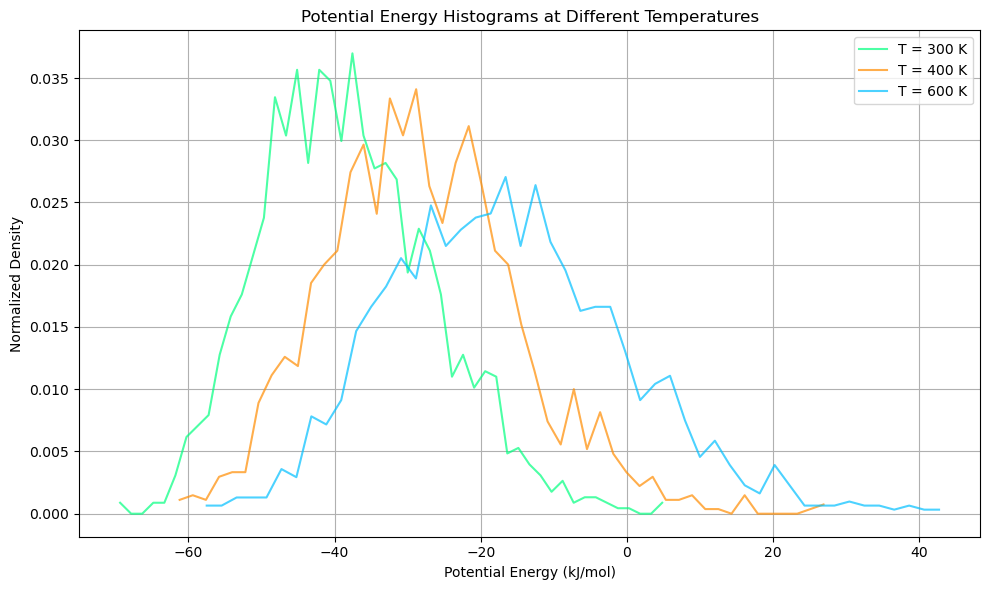

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to load energy data from .xvg files
def load_energy_data(file_path):
    data = np.loadtxt(file_path, comments=['@', '#'])
    return data[:, 1]  # Return the second column (energy values)

# Load potential energy data for each temperature
energy_300 = load_energy_data('T300/T300PE.xvg')
energy_400 = load_energy_data('T400/T400PE.xvg')
energy_600 = load_energy_data('T600/T600PE.xvg')

# Define histogram parameters
bins = 50  # Number of bins for the histogram

# Compute histograms
hist_300, edges_300 = np.histogram(energy_300, bins=bins, density=True)
hist_400, edges_400 = np.histogram(energy_400, bins=bins, density=True)
hist_600, edges_600 = np.histogram(energy_600, bins=bins, density=True)

# Calculate bin centers for plotting
bin_centers_300 = 0.5 * (edges_300[:-1] + edges_300[1:])
bin_centers_400 = 0.5 * (edges_400[:-1] + edges_400[1:])
bin_centers_600 = 0.5 * (edges_600[:-1] + edges_600[1:])

# Plotting the histograms
plt.figure(figsize=(10, 6))

plt.plot(bin_centers_300, hist_300, label='T = 300 K', alpha=0.7, color='springgreen')
plt.plot(bin_centers_400, hist_400, label='T = 400 K', alpha=0.7, color='darkorange')
plt.plot(bin_centers_600, hist_600, label='T = 600 K', alpha=0.7, color='deepskyblue')

plt.title('Potential Energy Histograms at Different Temperatures')
plt.xlabel('Potential Energy (kJ/mol)')
plt.ylabel('Normalized Density')
plt.legend()
plt.grid()
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('Potential_Energy.png', format='png')
plt.show()


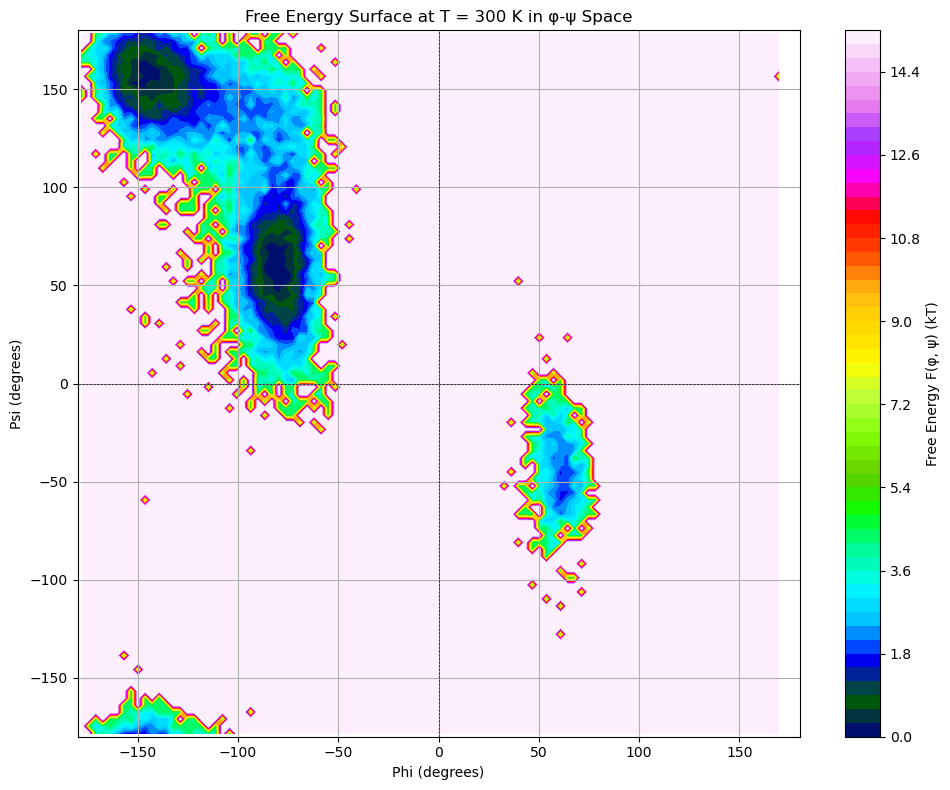

In [4]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def calculate_fes(trajectory_path, top_file, bins=100):
    # Load the trajectory
    trajectory = md.load(trajectory_path, top=top_file)

    # Select the atoms for phi and psi dihedrals
    phi_indices = [[0, 1, 2, 3]]  # Update based on your system
    psi_indices = [[1, 2, 3, 4]]   # Update based on your system

    # Calculate the dihedrals
    phi = md.compute_phi(trajectory, phi_indices)
    psi = md.compute_psi(trajectory, psi_indices)

    # Extract the dihedral angles and convert to degrees
    phi_degrees = np.degrees(phi[1].flatten())
    psi_degrees = np.degrees(psi[1].flatten())

    # Compute the 2D histogram
    hist, phi_edges, psi_edges = np.histogram2d(phi_degrees, psi_degrees, bins=[bins, bins], density=True)

    # Calculate free energy
    F = -np.log(hist + 1e-10)  # Adding a small constant to avoid log(0)
    F_min = F.min()  # Minimum value for normalization
    F -= F_min  # Normalize

    # Create meshgrid for plotting
    phi_centers = 0.5 * (phi_edges[:-1] + phi_edges[1:])
    psi_centers = 0.5 * (psi_edges[:-1] + psi_edges[1:])
    PHI, PSI = np.meshgrid(phi_centers, psi_centers)

    return PHI, PSI, F

# Call the function
PHI, PSI, F = calculate_fes('T300/adp_exchange3temps.trr', 'T300/adp_exchange3temps.gro')

# Plotting the free energy surface
plt.figure(figsize=(10, 8))
contour = plt.contourf(PHI, PSI, F.T, levels=50, cmap='gist_ncar')
plt.colorbar(contour, label='Free Energy F(φ, ψ) (kT)')
plt.title('Free Energy Surface at T = 300 K in φ-ψ Space')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='k', lw=0.5, ls='--')  # Horizontal line at 0
plt.axvline(0, color='k', lw=0.5, ls='--')  # Vertical line at 0
plt.grid()
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('T300Surface14.4kT.png', format='png')
plt.show()


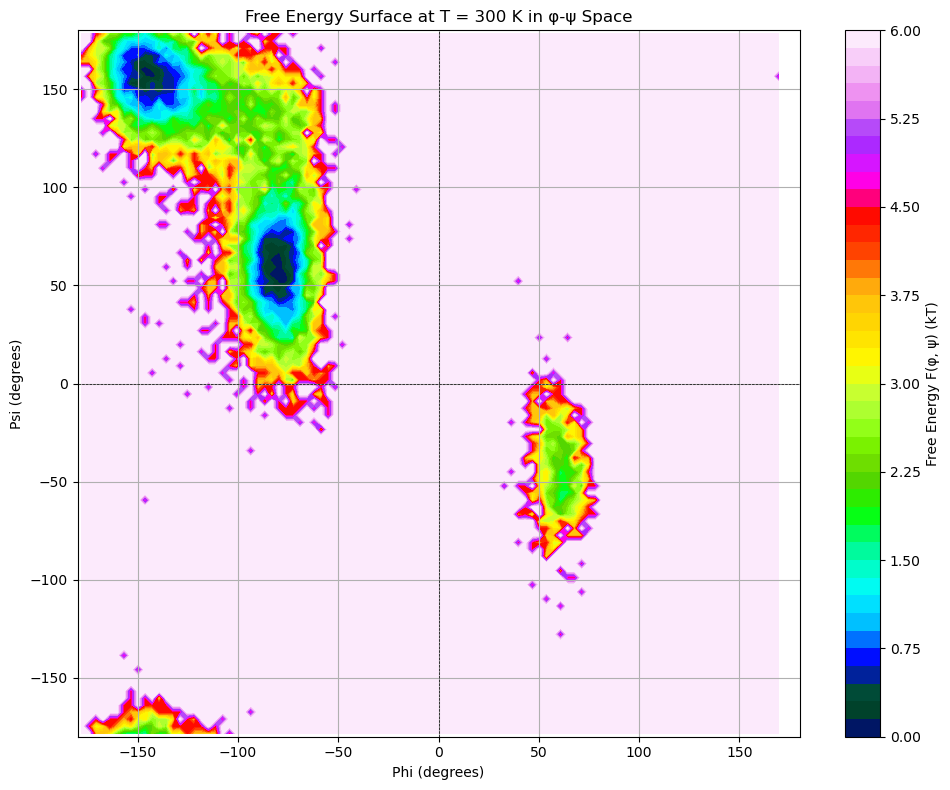

In [5]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def calculate_fes(trajectory_path, top_file, bins=100, max_fes=6.0):
    # Load the trajectory
    trajectory = md.load(trajectory_path, top=top_file)

    # Select the atoms for phi and psi dihedrals
    phi_indices = [[0, 1, 2, 3]]  # Update based on your system
    psi_indices = [[1, 2, 3, 4]]   # Update based on your system

    # Calculate the dihedrals
    phi = md.compute_phi(trajectory, phi_indices)
    psi = md.compute_psi(trajectory, psi_indices)

    # Extract the dihedral angles and convert to degrees
    phi_degrees = np.degrees(phi[1].flatten())
    psi_degrees = np.degrees(psi[1].flatten())

    # Compute the 2D histogram
    hist, phi_edges, psi_edges = np.histogram2d(phi_degrees, psi_degrees, bins=[bins, bins], density=True)

    # Calculate free energy
    F = -np.log(hist + 1e-10)  # Adding a small constant to avoid log(0)
    F_min = F.min()  # Minimum value for normalization
    F -= F_min  # Normalize

    # Clip the free energy to max_fes
    F = np.clip(F, None, max_fes)

    # Create meshgrid for plotting
    phi_centers = 0.5 * (phi_edges[:-1] + phi_edges[1:])
    psi_centers = 0.5 * (psi_edges[:-1] + psi_edges[1:])
    PHI, PSI = np.meshgrid(phi_centers, psi_centers)

    return PHI, PSI, F

# Call the function
PHI, PSI, F = calculate_fes('T300/adp_exchange3temps.trr', 'T300/adp_exchange3temps.gro')

# Plotting the free energy surface
plt.figure(figsize=(10, 8))
contour = plt.contourf(PHI, PSI, F.T, levels=50, cmap='gist_ncar', vmin=0, vmax=6)
plt.colorbar(contour, label='Free Energy F(φ, ψ) (kT)')
plt.title('Free Energy Surface at T = 300 K in φ-ψ Space')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='k', lw=0.5, ls='--')  # Horizontal line at 0
plt.axvline(0, color='k', lw=0.5, ls='--')  # Vertical line at 0
plt.grid()
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('T300Surface.png', format='png')
plt.show()


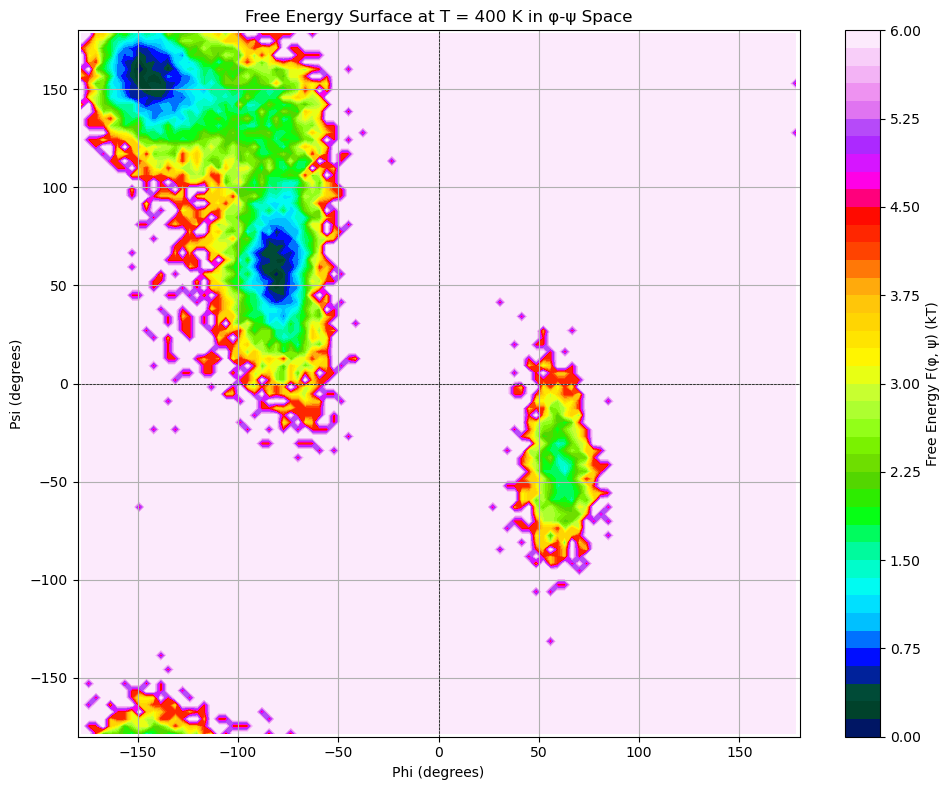

In [6]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def calculate_fes(trajectory_path, top_file, bins=100, max_fes=6.0):
    # Load the trajectory
    trajectory = md.load(trajectory_path, top=top_file)

    # Select the atoms for phi and psi dihedrals
    phi_indices = [[0, 1, 2, 3]]  # Update based on your system
    psi_indices = [[1, 2, 3, 4]]   # Update based on your system

    # Calculate the dihedrals
    phi = md.compute_phi(trajectory, phi_indices)
    psi = md.compute_psi(trajectory, psi_indices)

    # Extract the dihedral angles and convert to degrees
    phi_degrees = np.degrees(phi[1].flatten())
    psi_degrees = np.degrees(psi[1].flatten())

    # Compute the 2D histogram
    hist, phi_edges, psi_edges = np.histogram2d(phi_degrees, psi_degrees, bins=[bins, bins], density=True)

    # Calculate free energy
    F = -np.log(hist + 1e-10)  # Adding a small constant to avoid log(0)
    F_min = F.min()  # Minimum value for normalization
    F -= F_min  # Normalize

    # Clip the free energy to max_fes
    F = np.clip(F, None, max_fes)

    # Create meshgrid for plotting
    phi_centers = 0.5 * (phi_edges[:-1] + phi_edges[1:])
    psi_centers = 0.5 * (psi_edges[:-1] + psi_edges[1:])
    PHI, PSI = np.meshgrid(phi_centers, psi_centers)

    return PHI, PSI, F

# Call the function
PHI, PSI, F = calculate_fes('T400/adp_exchange3temps.trr', 'T400/adp_exchange3temps.gro')

# Plotting the free energy surface
plt.figure(figsize=(10, 8))
contour = plt.contourf(PHI, PSI, F.T, levels=50, cmap='gist_ncar', vmin=0, vmax=6)
plt.colorbar(contour, label='Free Energy F(φ, ψ) (kT)')
plt.title('Free Energy Surface at T = 400 K in φ-ψ Space')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='k', lw=0.5, ls='--')  # Horizontal line at 0
plt.axvline(0, color='k', lw=0.5, ls='--')  # Vertical line at 0
plt.grid()
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('T400Surface.png', format='png')

plt.show()


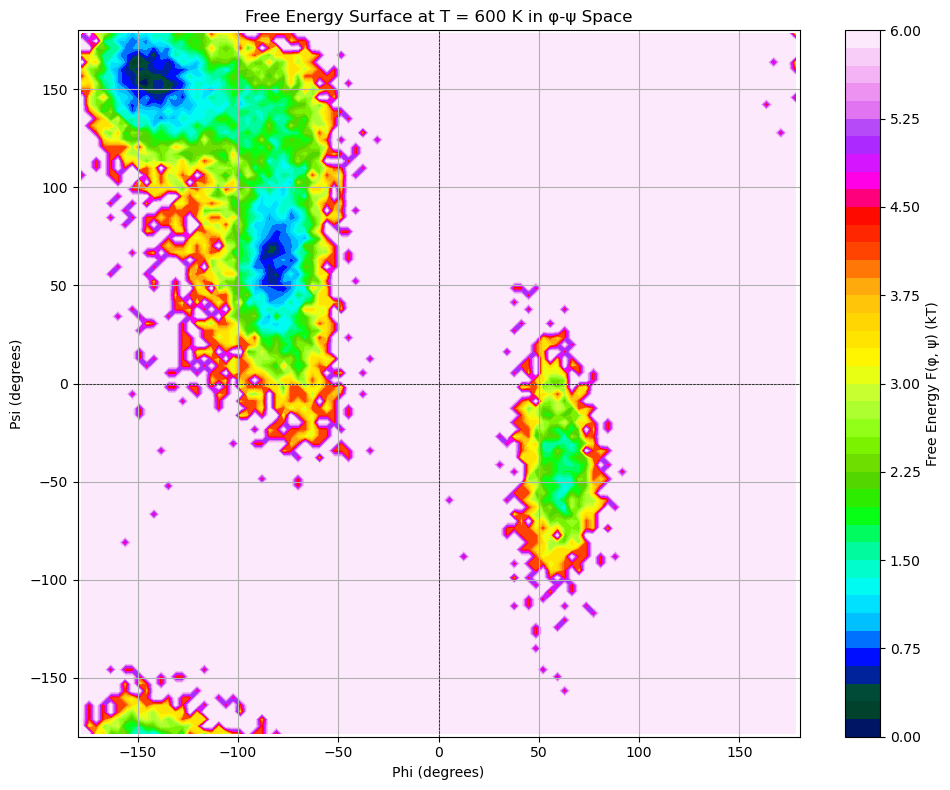

In [7]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def calculate_fes(trajectory_path, top_file, bins=100, max_fes=6.0):
    # Load the trajectory
    trajectory = md.load(trajectory_path, top=top_file)

    # Select the atoms for phi and psi dihedrals
    phi_indices = [[0, 1, 2, 3]]  # Update based on your system
    psi_indices = [[1, 2, 3, 4]]   # Update based on your system

    # Calculate the dihedrals
    phi = md.compute_phi(trajectory, phi_indices)
    psi = md.compute_psi(trajectory, psi_indices)

    # Extract the dihedral angles and convert to degrees
    phi_degrees = np.degrees(phi[1].flatten())
    psi_degrees = np.degrees(psi[1].flatten())

    # Compute the 2D histogram
    hist, phi_edges, psi_edges = np.histogram2d(phi_degrees, psi_degrees, bins=[bins, bins], density=True)

    # Calculate free energy
    F = -np.log(hist + 1e-10)  # Adding a small constant to avoid log(0)
    F_min = F.min()  # Minimum value for normalization
    F -= F_min  # Normalize

    # Clip the free energy to max_fes
    F = np.clip(F, None, max_fes)

    # Create meshgrid for plotting
    phi_centers = 0.5 * (phi_edges[:-1] + phi_edges[1:])
    psi_centers = 0.5 * (psi_edges[:-1] + psi_edges[1:])
    PHI, PSI = np.meshgrid(phi_centers, psi_centers)

    return PHI, PSI, F

# Call the function
PHI, PSI, F = calculate_fes('T600/adp_exchange3temps.trr', 'T600/adp_exchange3temps.gro')

# Plotting the free energy surface
plt.figure(figsize=(10, 8))
contour = plt.contourf(PHI, PSI, F.T, levels=50, cmap='gist_ncar', vmin=0, vmax=6)
plt.colorbar(contour, label='Free Energy F(φ, ψ) (kT)')
plt.title('Free Energy Surface at T = 600 K in φ-ψ Space')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.axhline(0, color='k', lw=0.5, ls='--')  # Horizontal line at 0
plt.axvline(0, color='k', lw=0.5, ls='--')  # Vertical line at 0
plt.grid()
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('T600Surface.png', format='png')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_xvg(file_path):
    """Reads an .xvg file and returns the x (frame number) and y (temperature) data."""
    frames = []
    temperatures = []

    with open(file_path, 'r') as file:
        for line in file:
            # Skip comments and empty lines
            if line.startswith(('#', '@')) or not line.strip():
                continue
            # Split the line into values and convert to float
            values = line.split()
            frames.append(float(values[0]))  # Assuming the first column is frame number
            temperatures.append(float(values[1]))  # Assuming the second column is temperature

    return np.array(frames), np.array(temperatures)

# Specify the path to your replica_temp.xvg file
file_path = 'replica_temp.xvg'  # Replace with your actual file path
frames, temperatures = read_xvg(file_path)

# Select every 100th frame
sampled_frames = frames[::100]
sampled_temperatures = temperatures[::100]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(sampled_frames, sampled_temperatures, linestyle='-', color='darkorange')
plt.title('Temperature of Replicas Over Frames (Sampled Every 100 Frames)')
plt.xlabel('Frame Number')
plt.ylabel('Temperature')
plt.grid()
plt.tight_layout()
 

# Save the figure as a PNG file
plt.savefig('replica_temperature_sampled_plot.png', dpi=300)

# Show the plot
plt.show()
